## Question 6. Are Certain Actors More Likely to Be Typecast into Specific Archetypes?

## Part 1. Actors to be typecasted to specific archetypes

In [111]:
#ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML
import io
from datetime import datetime

In [89]:
#ignore
archetype_data = pd.read_csv('../../data/enriched/persona_identification/archetype_predictions_joined.csv')
character_data = pd.read_csv('../../data/MovieSummaries/character_processed.csv')
character_data = character_data.rename(columns={
    'Wikipedia movie ID': "wikipedia_movie_id",
    'Freebase movie ID': "fb_movie_id",
    'Character name': "character_name",
    'Actor gender': "actor_gender",
    'Actor height (in meters)': "actor_height",
    'Actor ethnicity (Freebase ID)': "fb_actor_eth_id",
    'Actor name': "actor_name",
    'Freebase character/actor map ID': "fb_char_actor_map_id",
    'Freebase character ID': "fb_char_id",
    'Freebase actor ID': "fb_actor_id",
})
character_data = character_data.drop_duplicates(subset=["fb_movie_id", "fb_actor_id", "character_name"])

df = pd.merge(
    archetype_data, 
    character_data, 
    how="inner", 
    left_on=["actor_fb_id", "movie_fb_id", "character_name"], 
    right_on=["fb_actor_id", "fb_movie_id", "character_name"]
)
df = df.rename(columns={'original_response': "archetype"})
df.head(3)

Unnamed: 0                      prediction                       archetype  \
0           0             Mentor / Wise Guide             Mentor / Wise Guide   
1           1  Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   
2           2  Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   

          character_name            movie_name movie_fb_id actor_fb_id  \
0            Umeko Tsuda                Leonie  /m/05zr2p5   /m/0c7tjc   
1  '2-Gun' Gertie Baxter            Roxie Hart  /m/026l5ym   /m/049wny   
2        'A.J.' Furnival  The Groom Wore Spurs  /m/05nszz2    /m/0h7dd   

           model  wikipedia_movie_id fb_movie_id  ... actor_height  \
0  gpt-3.5-turbo            22611767  /m/05zr2p5  ...        1.540   
1         gpt-4o             7950950  /m/026l5ym  ...        1.630   
2  gpt-3.5-turbo            33509255  /m/05nszz2  ...        1.638   

   fb_actor_eth_id     actor_name fb_char_actor_map_id  fb_char_id  \
0              NaN   Mieko Harada           /m/0fpvy15  /m/0n37v4l   
1              NaN    Iris Adrian           /m/06plhhz  /m/06plhcj   
2              NaN  Ginger Rogers           /m/05ns_30  /m/0h1pslb   

  fb_actor_id actor_date_of_birth movie_release_date ethn_name race  
0   /m/0c7tjc          1958-12-26         2010-01-01       NaN  NaN  
1   /m/049wny          1912-05-29         1942-02-20       NaN  NaN  
2    /m/0h7dd          1911-07-16         1951-01-01       NaN  NaN  

[3 rows x 21 columns]

In [90]:
#ignore
init_df = df.copy()

To answer this question let's find the actors sorted in a way of how many roles (characters) they've played

In [5]:
unique_roles_counts = (
    df.groupby('actor_name')['character_name']
    .nunique()
    .reset_index()
)

unique_roles_counts.columns = ['actor_name', 'unique_character_count']
sorted_actors = unique_roles_counts.sort_values(by='unique_character_count', ascending=False)
sorted_actors.head() 

actor_name  unique_character_count
12536          John Wayne                     129
16022           Mammootty                     127
18105            Mohanlal                     119
976      Amitabh Bachchan                     111
17255           Mel Blanc                      97
17415       Michael Caine                      86
986           Amrish Puri                      76
1605        Anthony Quinn                      72
4456   Christopher Walken                      70
21410       Robert Duvall                      68

Now let's check how many actors have 10 or more roles played 

In [6]:
#ignore
actors_with_10_plus_roles = sorted_actors[sorted_actors['unique_character_count'] >= 10]
number_of_actors_10_plus = len(actors_with_10_plus_roles)
print(f'Number of actors with 10 or more unique roles: {number_of_actors_10_plus}')

Number of actors with 10 or more unique roles: 1744


#ignore
This is a sufficient amount of actors to analyze. Now let's make a distribution of archetypes for each actor

In [7]:
#ignore
filtered_df = df[df['actor_name'].isin(actors_with_10_plus_roles['actor_name'])]
filtered_df.head(2)

Unnamed: 0                      prediction                       archetype  \
2           2  Rogue / Trickster / Con Artist  Rogue / Trickster / Con Artist   
4           4             Warrior / Vigilante             Warrior / Vigilante   

       character_name            movie_name movie_fb_id actor_fb_id  \
2     'A.J.' Furnival  The Groom Wore Spurs  /m/05nszz2    /m/0h7dd   
4  'Baby Face' Martin              Dead End    /m/0gnrt    /m/03n6r   

           model  wikipedia_movie_id fb_movie_id  ... actor_height  \
2  gpt-3.5-turbo            33509255  /m/05nszz2  ...        1.638   
4         gpt-4o               61525    /m/0gnrt  ...        1.740   

   fb_actor_eth_id       actor_name fb_char_actor_map_id  fb_char_id  \
2              NaN    Ginger Rogers           /m/05ns_30  /m/0h1pslb   
4        /m/07mqps  Humphrey Bogart            /m/0jx1fs  /m/0gz4xcm   

  fb_actor_id actor_date_of_birth movie_release_date ethn_name      race  
2    /m/0h7dd          1911-07-16         1951-01-01       NaN       NaN  
4    /m/03n6r          1899-12-25         1937-01-01     Dutch  European  

[2 rows x 21 columns]

In [8]:
#ignore
archetype_distribution = (
    filtered_df.groupby(['actor_name', 'archetype'])
    .size()
    .reset_index(name='count')
)
archetype_distribution.head(3)

actor_name                         archetype  count
0  A. J. Cook                Caregiver / Healer      1
1  A. J. Cook             Innocent / Vulnerable      2
2  A. J. Cook  Love Interest / Romantic Partner      2

Now let's normalize the counts:

In [9]:
#ignore
total_roles_per_actor = (
    archetype_distribution.groupby('actor_name')['count']
    .sum()
    .reset_index()
)
total_roles_per_actor.columns = ['actor_name', 'total_roles']

archetype_distribution = pd.merge(archetype_distribution, total_roles_per_actor, on='actor_name')
archetype_distribution['probability'] = archetype_distribution['count'] / archetype_distribution['total_roles']

archetype_distribution.head(3)

actor_name                         archetype  count  total_roles  \
0  A. J. Cook                Caregiver / Healer      1           10   
1  A. J. Cook             Innocent / Vulnerable      2           10   
2  A. J. Cook  Love Interest / Romantic Partner      2           10   

   probability  
0          0.1  
1          0.2  
2          0.2

Now we can visualize the archetype distribution for each actor using a bar plot

In [51]:
#ignore
def plot_archetype_distribution(actor_name, archetype_distribution_df):
    actor_data = archetype_distribution_df[archetype_distribution_df['actor_name'] == actor_name]

    if actor_data.empty:
        print(f"No data found for actor: {actor_name}")
        return

    plt.figure(figsize=(10, 6))
    sns.barplot(data=actor_data, x='archetype', y='probability', hue='archetype', dodge=False)

    plt.title(f'Archetype Distribution for {actor_name}', fontsize=16)
    plt.xlabel('Archetype', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  
    plt.tight_layout()
    plt.show()

In [15]:
#hidecode
actors = actors_with_10_plus_roles['actor_name'].head(10).tolist()

fig = go.Figure()

for actor in actors:
    filtered_data = archetype_distribution[archetype_distribution["actor_name"] == actor]
    fig.add_trace(go.Bar(
        x=filtered_data["archetype"],
        y=filtered_data["probability"],
        name=actor,
        visible=False
    ))

fig.data[0].visible = True

fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "method": "update",
                    "label": actor,
                    "args": [{"visible": [i == j for i in range(len(actors))]}]
                }
                for j, actor in enumerate(actors)
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    annotations=[
        {
            "text": "Select Actor:",
            "x": 0,
            "xref": "paper",
            "y": 1.15,
            "yref": "paper",
            "showarrow": False,
            "font": {"size": 14}
        }
    ],
    title="Archetype Probability Distribution by Actor",
    title_x=0.5
)

buffer = io.StringIO()

fig.write_html(buffer, full_html=False, include_plotlyjs='cdn')

html = buffer.getvalue()
display(HTML(html))

fig.show()

By looking at these plots we clearly see that certain actors are more likely to be typecast into specific archetypes. Now let's use some of the statistical approaches and look at the results. For each actor let's define a metric of "probability to being typecasted to the specific (set of) archetypes" as the highest probability among the archetypes in the previous charts. Then let's see the distribution of this value for each actor and visualize it.

In [47]:
max_probabilities = (
    archetype_distribution
    .groupby('actor_name')['probability']
    .max()
    .reset_index()
)

max_probabilities.columns = ['actor_name', 'max_probability']
max_probabilities.head(10)

actor_name  max_probability
0         A. J. Cook         0.200000
1         A.K Hangal         0.411765
2         Aamir Khan         0.360000
3      Aaron Eckhart         0.315789
4      Aaron Johnson         0.272727
5     Aarti Chhabria         0.600000
6       Aasif Mandvi         0.272727
7              Abbas         0.200000
8  Abhi Bhattacharya         0.200000
9  Abhishek Bachchan         0.428571

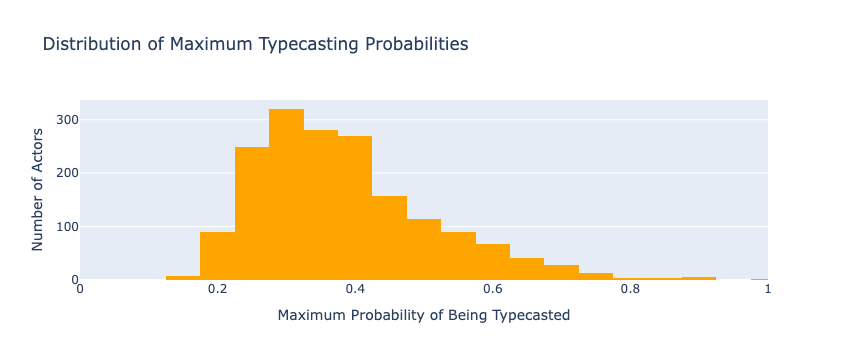

In [56]:
fig = px.histogram(max_probabilities, 
                   x='max_probability', 
                   nbins=20, 
                   title='Distribution of Maximum Typecasting Probabilities',
                   labels={'max_probability': 'Maximum Probability of Being Typecasted'},
                   color_discrete_sequence=['orange'])

fig.update_layout(
    xaxis_title='Maximum Probability of Being Typecasted',
    yaxis_title='Number of Actors',
    xaxis=dict(nticks=10, range=[0, 1]),
    yaxis_title_standoff=10
)

fig.show()

Let's analyze this distribution. First, let's look at the descriptive statistics

In [70]:
max_probabilities.describe()

max_probability
count      1744.000000
mean          0.385056
std           0.129078
min           0.150000
25%           0.294118
50%           0.357143
75%           0.454545
max           1.000000

We can see that the mean is 0.39, meaning that on average 4 times out of 10 (almost a half of the times) actors got selected for the roles with the specific archetypes. However, this does not give us a clear understanding, so let's also perform the Chi-Square Test:

In [73]:
from scipy.stats import chi2_contingency

max_probabilities['binned'] = pd.cut(max_probabilities['max_probability'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(max_probabilities['actor_name'], max_probabilities['binned'])


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2_stat}, p-value: {p_value}, Degrees of Freedom: {dof}')

Chi-square Statistic: 3488.0000000000005, p-value: 0.48726319957658, Degrees of Freedom: 3486


Given the high p-value = 0.487 > 0.05 we conclude that there is no significant association (in this mathematical abstraction). In other words, the distribution of maximum probabilities categorized as 'Low', 'Medium', and 'High' does not significantly depend on the actors.
The possible explanation and further development could be that we define max_probability not as the maximum probability for the specific archetype, but take, for example, 3 archetypes with maximum probabilities, which I believe will give the positive answer for this question. Let us check the contingency table and then redefine the max_probability.

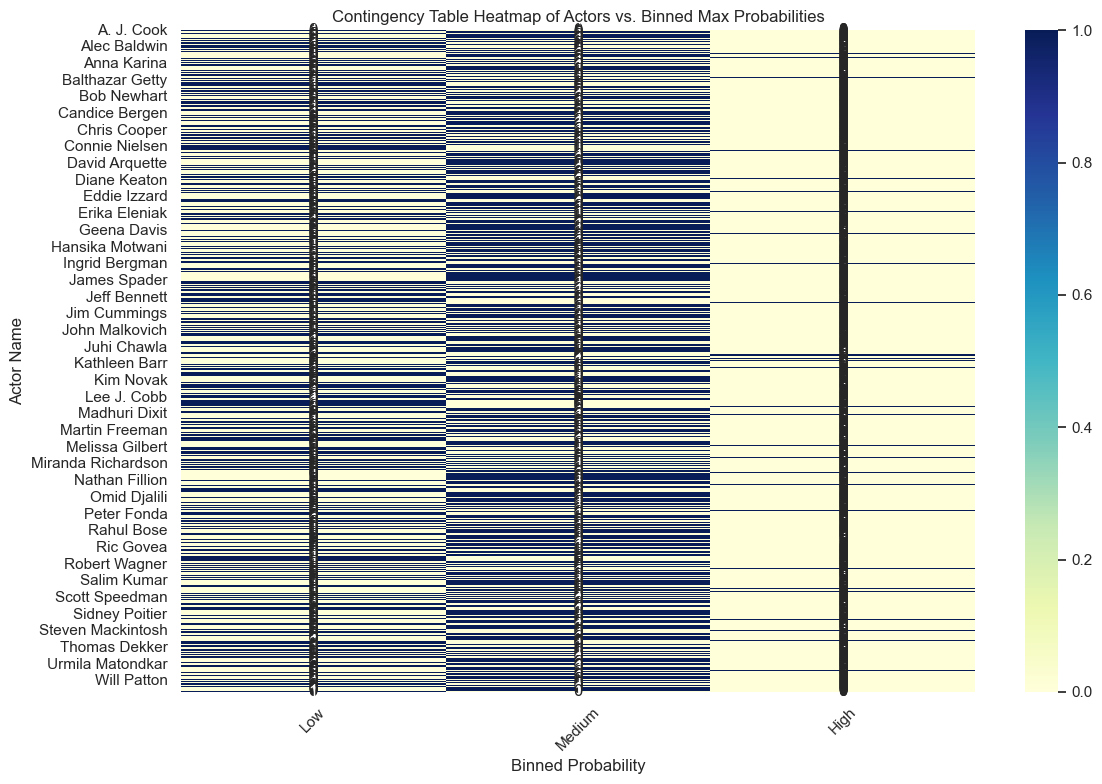

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Contingency Table Heatmap of Actors vs. Binned Max Probabilities')
plt.xlabel('Binned Probability')
plt.ylabel('Actor Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
top_3_sum_probabilities = (
    archetype_distribution
    .groupby('actor_name')['probability']
    .apply(lambda x: x.nlargest(3).sum()) 
    .reset_index()
)

top_3_sum_probabilities.columns = ['actor_name', 'sum_top_3_probabilities']

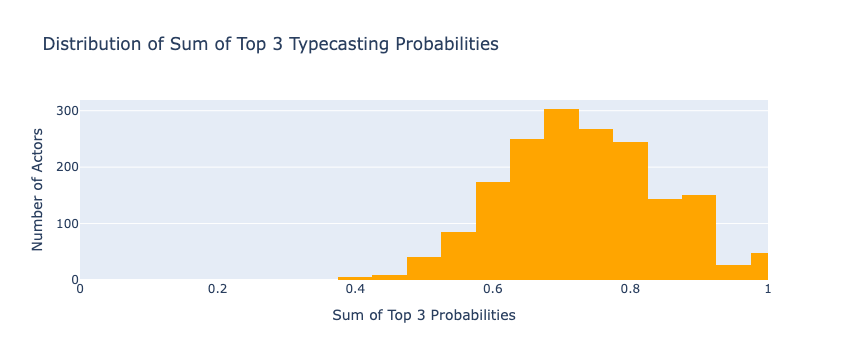

In [78]:
fig = px.histogram(top_3_sum_probabilities, 
                   x='sum_top_3_probabilities', 
                   nbins=20,
                   title='Distribution of Sum of Top 3 Typecasting Probabilities',
                   labels={'sum_top_3_probabilities': 'Sum of Top 3 Probabilities'},
                   color_discrete_sequence=['orange'])

fig.update_layout(
    xaxis_title='Sum of Top 3 Probabilities',
    yaxis_title='Number of Actors',
    xaxis=dict(nticks=10, range=[0, 1]), 
    yaxis_title_standoff=10
)

fig.show()

In [79]:
top_3_sum_probabilities.describe()

sum_top_3_probabilities
count              1744.000000
mean                  0.731918
std                   0.116027
min                   0.400000
25%                   0.647059
50%                   0.727273
75%                   0.812500
max                   1.000000

In [83]:
top_3_sum_probabilities['binned'] = pd.cut(
    top_3_sum_probabilities['sum_top_3_probabilities'],
    bins=[0, 0.33, 0.66, 1], 
    labels=['Low', 'Medium', 'High']
)

contingency_table = pd.crosstab(top_3_sum_probabilities['actor_name'], top_3_sum_probabilities['binned'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2_stat}, p-value: {p_value}, Degrees of Freedom: {dof}')

Chi-square Statistic: 1744.0, p-value: 0.4887414065286344, Degrees of Freedom: 1743


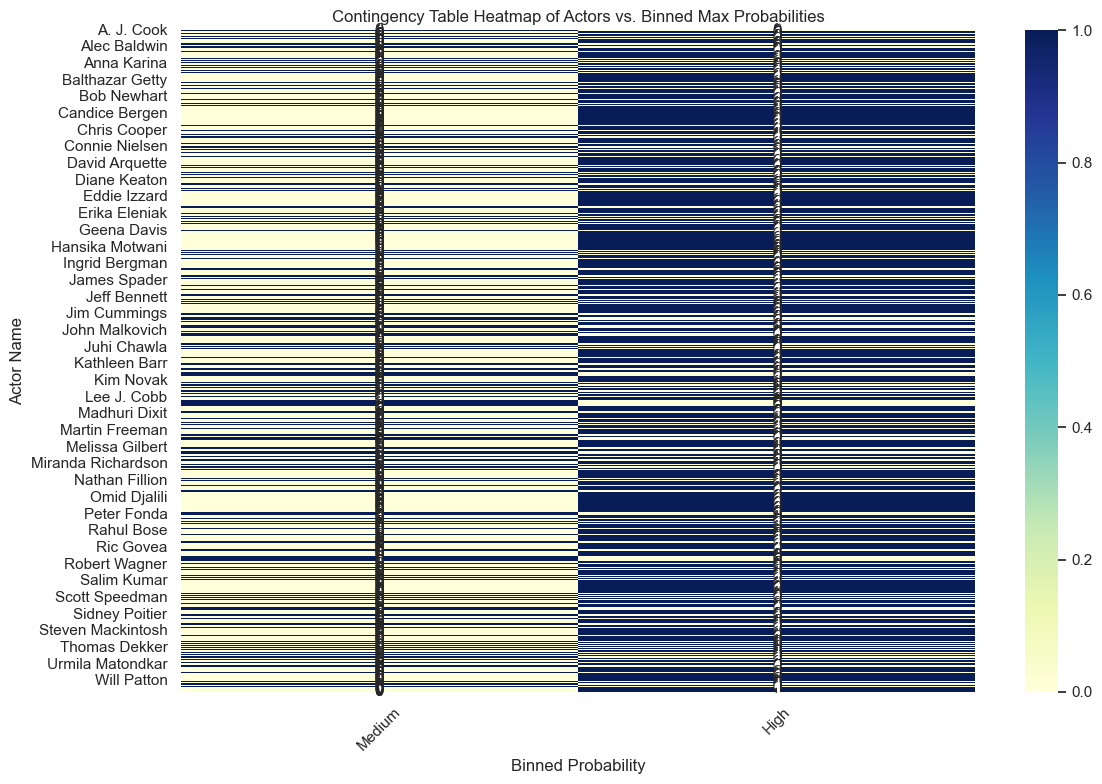

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Contingency Table Heatmap of Actors vs. Binned Max Probabilities')
plt.xlabel('Binned Probability')
plt.ylabel('Actor Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion
Even though the Chi-square test didn't provide a positive answer, the answer to this question varies on different parameters. with the mean of the distribution being significant with any definition of max_probabilities we can conclude that the hypothesis is somewhat relevant.

## Part 2. Analyzing the typecasting of actors with specific traits to the archetypes



### Gender

Let us create a separate dataframe to analyze the distribution of ```actor_gender``` by each archetype with significant occurrences.

In [37]:
#hidecode
df_by_gender = df[df['archetype'].str.len() <= 30].groupby(['archetype', 'actor_gender'])
df_by_gender = df_by_gender.size().reset_index(name='count')
df_by_gender = df_by_gender.pivot(index='archetype', columns='actor_gender', values='count').fillna(0).astype(int)
df_by_gender['total'] = df_by_gender.get('M', 0) + df_by_gender.get('F', 0)
df_by_gender = df_by_gender[df_by_gender['total'] >= 100]
df_by_gender

actor_gender                       F      M  total
archetype                                         
Caregiver / Healer              4705   2041   6746
Innocent / Vulnerable           2587   1434   4021
Mentor / Wise Guide             1644   6721   8365
Mystic / Seer                    849   1113   1962
Other                           3567   4442   8009
Outsider / Loner                 982   2491   3473
Rogue / Trickster / Con Artist  3933  13848  17781
Ruler / Politician               623   4453   5076
Sidekick / Loyal Companion      1605   7721   9326
Warrior / Vigilante              736   5066   5802

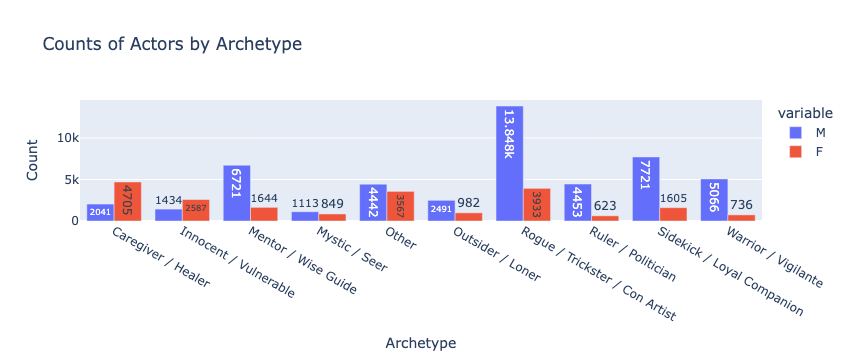

In [39]:
#hidecode
fig = px.bar(
    df_by_gender.reset_index(), 
    x='archetype',
    y=['M', 'F'],                    
    title='Counts of Actors by Archetype',
    labels={'value': 'Count', 'archetype': 'Archetype'},
    text_auto=True,                  
    barmode='group'               
)
fig.show()

### Conclusions
From here we can draw some conclusions:
- Women represent the Caregiver / Healer archetype in the movies significatly more often than Men
- Women represent the Innocent / Vulnerable archetype in the movies more often than Men
- Men represent the following archetypes in the movies significatly more often than Women:
    * Mentor / Wise Guide,
  * Outsider / Loner,
  * Rogue / Thinkster / Con Artist,
  * Ruler / Politician, Sidekick / Loyal Companion,
  * Warrior / Vigilante

Some of the biases could include the samplings of the movies in our dataset, however general trends are visible from this barplot and also correlate with stereotypical representation. 

### Height

Let us plot a distribution of actors by height and define 3 categories: lower than 25 percentile - small, 25-75 - medium, 75-100 - high. After we can analyze how actors with the height in the specific range are distributed across the archetypes. The important note is that men are on average heigher then women, so for the clearness of our assumptions let's take men's data, for example (same can be applied for women).

In [95]:
#hidecode
df = df[(df['actor_height'] <= 2.1) & (df['actor_height'] >= 1.5) & (df['actor_gender'] == 'M')]

percentiles = df['actor_height'].quantile([0.25, 0.75])
p25 = percentiles[0.25]
p75 = percentiles[0.75]

print(f"Small Threshold: {p25}")
print(f"High Threshold: {p75}")

def categorize_height(height):
    if height < p25:
        return 'Small'
    elif p25 <= height <= p75:
        return 'Medium'
    else:
        return 'High'

df.loc[:, 'height_category'] = df['actor_height'].apply(categorize_height)

df_heights = df[['actor_name', 'actor_height', 'height_category']].head(5)
df_heights.head()

Small Threshold: 1.75
High Threshold: 1.85


actor_name  actor_height height_category
4   Humphrey Bogart          1.74           Small
6        Matt McCoy          1.85          Medium
9       Faizon Love          1.77          Medium
14    Robert Taylor          1.82          Medium
15  Humphrey Bogart          1.74           Small

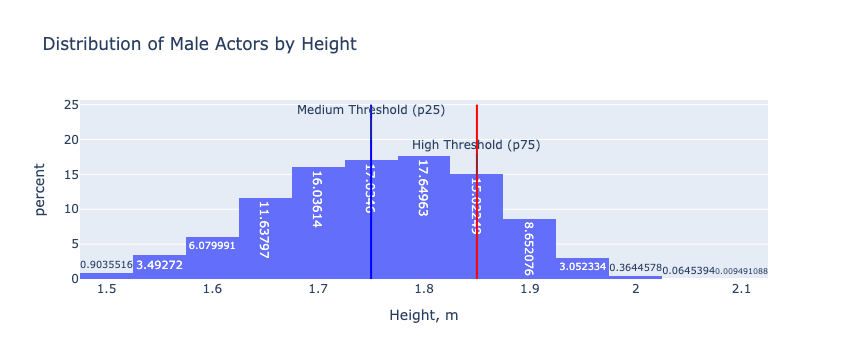

In [100]:
#hidecode
fig = px.histogram(
    df_sorted,
    x='actor_height',
    title='Distribution of Male Actors by Height',
    labels={'actor_height': 'Height, m'},
    nbins=30, 
    text_auto=True,
    histnorm='percent'
)

fig.add_shape(
    type='line',
    x0=p25, y0=0, 
    x1=p25, y1=25,  
    line=dict(color='blue'),  
    name='25th Percentile'
)

fig.add_shape(
    type='line',
    x0=p75, y0=0, 
    x1=p75, y1=25,  
    line=dict(color='red'), 
    name='75th Percentile'
)
fig.add_annotation(
    x=p25,
    y=20, 
    text='Medium Threshold (p25)',
    ax=0,
)

fig.add_annotation(
    x=p75,
    y=15, 
    text='High Threshold (p75)',
    ax=0,
)

fig.show()

In [97]:
#hidecode
df_by_height = df[df['archetype'].str.len() <= 30]
df_by_height = df_by_height.groupby(['archetype', 'height_category']).size().reset_index(name='count')
df_by_height = df_by_height.pivot(index='archetype', columns='height_category', values='count').fillna(0).astype(int)
df_by_height['total'] = df_by_height.sum(axis=1)
df_by_height = df_by_height[df_by_height['total'] >= 100]
df_by_height

height_category                 High  Medium  Small  total
archetype                                                 
Caregiver / Healer               267     607    237   1111
Innocent / Vulnerable             78     404    253    735
Mentor / Wise Guide             1110    2301    719   4130
Mystic / Seer                    187     318    113    618
Other                            381     803    371   1555
Outsider / Loner                 308     902    310   1520
Rogue / Trickster / Con Artist  2036    4782   1693   8511
Ruler / Politician               733    1240    341   2314
Sidekick / Loyal Companion       988    2256   1090   4334
Warrior / Vigilante             1090    1864    493   3447

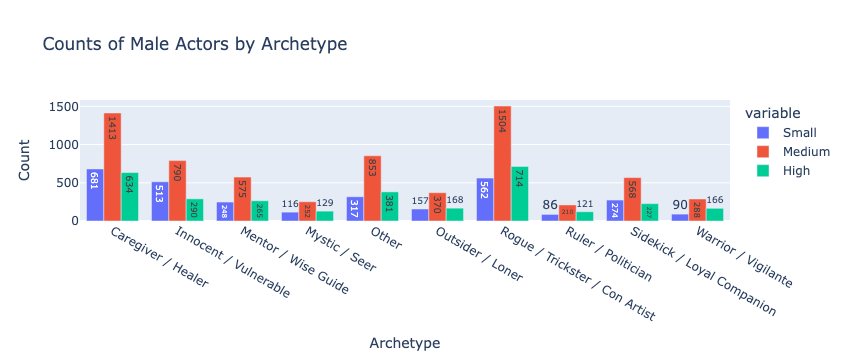

In [142]:
#hidecode
fig = px.bar(
    df_by_height.reset_index(), 
    x='archetype',
    y=['Small', 'Medium', 'High'],                    
    title='Counts of Male Actors by Archetype',
    labels={'value': 'Count', 'archetype': 'Archetype'},
    text_auto=True,                  
    barmode='group'               
)
fig.show()

From here we can see that it is uncommon for the Innocent / Vulnerable archetype, for example, to be played by high actors.
Another insight could be that for Ruler / Politician and Warrior / Vigilante it is uncommon that actors with small height play them. We would use these insights in our further analysis. Now let's do the same with women and get:

In [105]:
#ignore
df = init_df.copy() 
df = df[(df['actor_height'] <= 2.1) & (df['actor_height'] >= 1.5) & (df['actor_gender'] == 'F')]

percentiles = df['actor_height'].quantile([0.25, 0.75])
p25 = percentiles[0.25]
p75 = percentiles[0.75]

print(f"Small Threshold: {p25}")
print(f"High Threshold: {p75}")

def categorize_height(height):
    if height < p25:
        return 'Small'
    elif p25 <= height <= p75:
        return 'Medium'
    else:
        return 'High'

df.loc[:, 'height_category'] = df['actor_height'].apply(categorize_height)
df_heights = df[['actor_name', 'actor_height', 'height_category']].head(5)
df_heights.head()

Small Threshold: 1.62
High Threshold: 1.71


actor_name  actor_height height_category
0      Mieko Harada         1.540           Small
1       Iris Adrian         1.630          Medium
2     Ginger Rogers         1.638          Medium
5   Morgan Brittany         1.626          Medium
13    Louise Brooks         1.570           Small

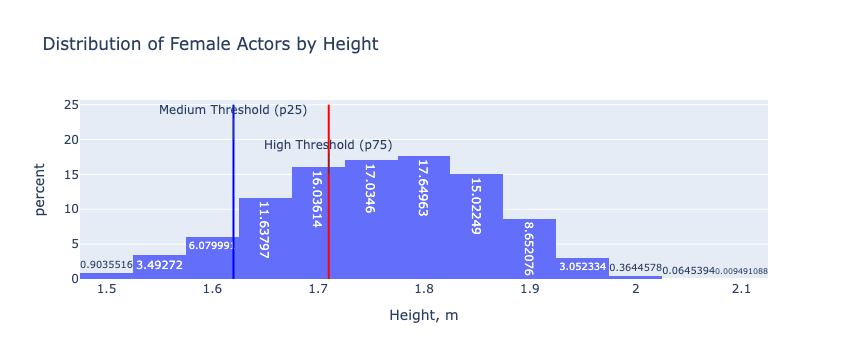

In [106]:
#hidecode
fig = px.histogram(
    df_sorted,
    x='actor_height',
    title='Distribution of Female Actors by Height',
    labels={'actor_height': 'Height, m'},
    nbins=30, 
    text_auto=True,
    histnorm='percent'
)

fig.add_shape(
    type='line',
    x0=p25, y0=0, 
    x1=p25, y1=25,  
    line=dict(color='blue'),  
    name='25th Percentile'
)

fig.add_shape(
    type='line',
    x0=p75, y0=0, 
    x1=p75, y1=25,  
    line=dict(color='red'), 
    name='75th Percentile'
)
fig.add_annotation(
    x=p25,
    y=20, 
    text='Medium Threshold (p25)',
    ax=0,
)

fig.add_annotation(
    x=p75,
    y=15, 
    text='High Threshold (p75)',
    ax=0,
)

fig.show()

In [107]:
#ignore
df_by_height = df[df['archetype'].str.len() <= 30]
df_by_height = df_by_height.groupby(['archetype', 'height_category']).size().reset_index(name='count')
df_by_height = df_by_height.pivot(index='archetype', columns='height_category', values='count').fillna(0).astype(int)
df_by_height['total'] = df_by_height.sum(axis=1)
df_by_height = df_by_height[df_by_height['total'] >= 100]
df_by_height

height_category                 High  Medium  Small  total
archetype                                                 
Caregiver / Healer               634    1413    681   2728
Innocent / Vulnerable            290     790    513   1593
Mentor / Wise Guide              265     575    248   1088
Mystic / Seer                    129     252    116    497
Other                            381     853    317   1551
Outsider / Loner                 168     370    157    695
Rogue / Trickster / Con Artist   714    1504    562   2780
Ruler / Politician               121     210     86    417
Sidekick / Loyal Companion       227     568    274   1069
Warrior / Vigilante              166     288     90    544

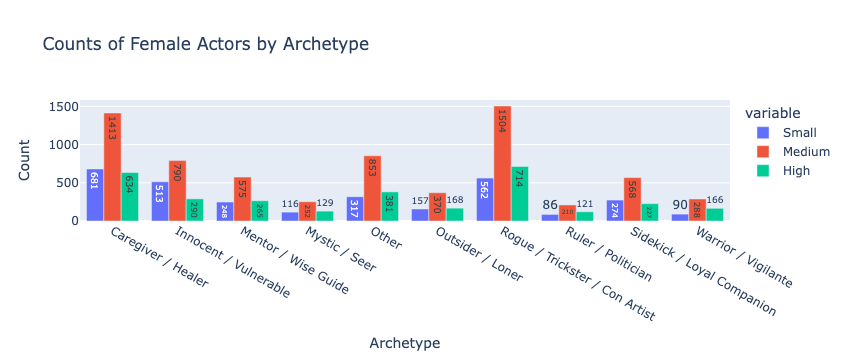

In [141]:
#hidecode
fig = px.bar(
    df_by_height.reset_index(), 
    x='archetype',
    y=['Small', 'Medium', 'High'],                    
    title='Counts of Female Actors by Archetype',
    labels={'value': 'Count', 'archetype': 'Archetype'},
    text_auto=True,                  
    barmode='group'               
)
fig.show()

From here we can see that it is uncommon for the Innocent / Vulnerable archetype, for example, to be played by high actresses, making an inclinde towards actresses with small and medium heights. However, the examples for Ruler / Politician and Warrior / Vigilante are not the same as with men, though we cannot draw conclusions from it.

In [29]:
df.columns

Index(['Unnamed: 0', 'prediction', 'archetype', 'character_name', 'movie_name',
       'movie_fb_id', 'actor_fb_id', 'model', 'wikipedia_movie_id',
       'fb_movie_id', 'actor_gender', 'actor_height', 'fb_actor_eth_id',
       'actor_name', 'fb_char_actor_map_id', 'fb_char_id', 'fb_actor_id',
       'actor_date_of_birth', 'movie_release_date', 'ethn_name', 'race'],
      dtype='object')

### Age

Let's follow the same logic and see the percentiles for age:

In [120]:
#hidecode
df = init_df.copy()
df['actor_date_of_birth'] = pd.to_datetime(df['actor_date_of_birth'], errors='coerce')
df['movie_release_date'] = pd.to_datetime(df['movie_release_date'], errors='coerce')
df['age_at_release'] = ((df['movie_release_date'] - df['actor_date_of_birth']).dt.days // 365).astype(int)
percentiles = df['age_at_release'].quantile([0.25, 0.75])
p25 = percentiles[0.25]
p75 = percentiles[0.75]

print(f"25th Percentile: {p25}")
print(f"75th Percentile: {p75}")

25th Percentile: 27.0
75th Percentile: 47.0


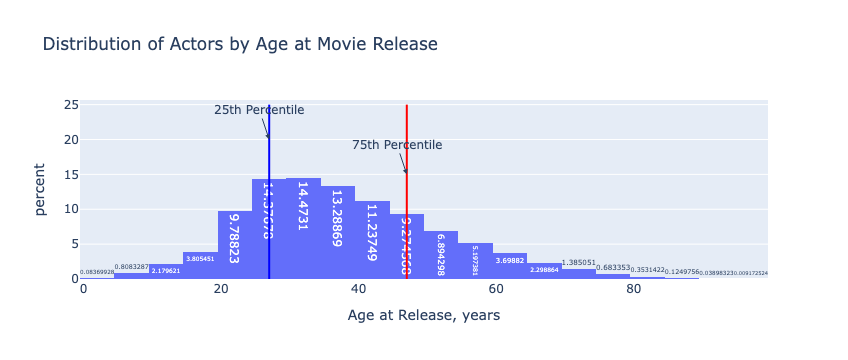

In [123]:
fig = px.histogram(
    df,
    x='age_at_release',
    title='Distribution of Actors by Age at Movie Release',
    labels={'age_at_release': 'Age at Release, years'},
    nbins=30, 
    text_auto=True,
    histnorm='percent'
)

fig.add_shape(
    type='line',
    x0=p25, y0=0, 
    x1=p25, y1=25, 
    line=dict(color='blue')
)

fig.add_shape(
    type='line',
    x0=p75, y0=0, 
    x1=p75, y1=25, 
    line=dict(color='red')
)

fig.add_annotation(
    x=p25,
    y=20,  
    text='25th Percentile',
    showarrow=True,
    arrowhead=2
)

fig.add_annotation(
    x=p75,
    y=15,  
    text='75th Percentile',
    showarrow=True,
    arrowhead=2
)
fig.show()

For this particular case let's consider actors with the age less or equal than 20 as young and more or equal than 60 as old and make a new pivoted table as in the previous cases.

In [137]:
#hidecode
def categorize_age(age):
    if age <= 20:
        return 'Young'
    elif age >= 60:
        return 'Old'
    else:
        return 'Middle-aged' 

df['age_category'] = df['age_at_release'].apply(categorize_age)

df_by_age = df[df['archetype'].str.len() <= 30] 
df_by_age = df_by_age.groupby(['archetype', 'age_category']).size().reset_index(name='count')
df_by_age = df_by_age.pivot(index='archetype', columns='age_category', values='count').fillna(0).astype(int)
df_by_age['total'] = df_by_age.sum(axis=1)
df_by_age = df_by_age[df_by_age['total'] >= 100]
df_by_age.head(10)

age_category                    Middle-aged   Old  Young  total
archetype                                                      
Caregiver / Healer                     5364   871    522   6757
Innocent / Vulnerable                  2213    76   1748   4037
Mentor / Wise Guide                    6421  1660    294   8375
Mystic / Seer                          1525   308    134   1967
Other                                  6672   790    583   8045
Outsider / Loner                       2899   212    372   3483
Rogue / Trickster / Con Artist        16022  1185    605  17812
Ruler / Politician                     3916  1112     58   5086
Sidekick / Loyal Companion             7869   489    997   9355
Warrior / Vigilante                    5356   198    254   5808

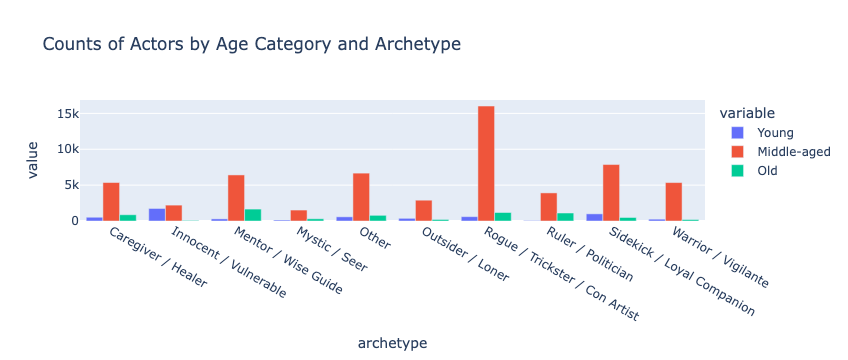

In [143]:
fig = px.bar(
    df_by_age.reset_index(), 
    x='archetype',
    y=['Young', 'Middle-aged', 'Old'],      
    title='Counts of Actors by Age Category and Archetype',
    labels={'age_category': 'Age Category', 'count': 'Number of Actors'},
    barmode='group'  
)
fig.show()

Here are some insights we can draw from this plot:
- If an actor is old, then for the archetypes of Mentor / Wise Guide it is higly possible that this actor can play it (the ratio with Middle-aged is not as big as for others). Other possible archetypes are Ruler / Politician (with also good ratio) or Rogue / Trickster / Con Artist (though less probable)
- If an actor is young, then it is a high chance he/she would be typecasted to Innocent / Vulnerable archetype.

## Insights Check